# KNN Classification

In [164]:
import numpy as np
import pandas as dp
import csv
from sklearn.neighbors import KDTree
import pandas as pd
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [126]:
# Reading data
df = dp.read_csv("./0-train.csv")
class_0 = np.array(df).astype(float)
df = dp.read_csv("./1-train.csv")
class_1 = np.array(df).astype(float)
df = dp.read_csv("./2-train.csv")
class_2 = np.array(df).astype(float)
df = dp.read_csv("./3-train.csv")
class_3 = np.array(df).astype(float)
df = dp.read_csv("./4-train.csv")
class_4 = np.array(df).astype(float)



## Formatting data to KDTree

In [152]:
x_train = np.empty(0)
x_train = np.array(class_0)
x_train = np.concatenate([x_train, class_1])
x_train = np.concatenate([x_train, class_2])
x_train = np.concatenate([x_train, class_3])
x_train = np.concatenate([x_train, class_4])
print(x_train.shape)

(6467, 78)


In [153]:
# Generating labels to data
y_train = np.empty(0)
y_train = np.repeat(0, class_0.shape[0])
y_train = np.append(y_train, np.repeat(1, class_1.shape[0]))
y_train = np.append(y_train, np.repeat(2, class_2.shape[0]))
y_train = np.append(y_train, np.repeat(3, class_3.shape[0]))
y_train = np.append(y_train, np.repeat(4, class_4.shape[0]))
print(y_train.shape)

(6467,)


## Test Data

In [178]:
df = dp.read_csv("./0-test.csv")
class_0_test = np.array(df).astype(float)
df = dp.read_csv("./1-test.csv")
class_1_test = np.array(df).astype(float)
df = dp.read_csv("./2-test.csv")
class_2_test = np.array(df).astype(float)
df = dp.read_csv("./3-test.csv")
class_3_test = np.array(df).astype(float)
df = dp.read_csv("./4-test.csv")
class_4_test = np.array(df).astype(float)


In [188]:
x_test = np.array(class_0_test)
x_test = np.concatenate([x_test, class_1_test])
x_test = np.concatenate([x_test, class_2_test])
x_test = np.concatenate([x_test, class_3_test])
x_test = np.concatenate([x_test, class_4_test])
print(x_test.shape)

(2180, 78)


In [189]:
print(class_0_test.shape[0] +class_1_test.shape[0] +class_2_test.shape[0] +class_3_test.shape[0] +class_4_test.shape[0])
y_test = np.repeat(0, class_0_test.shape[0])
y_test = np.append(y_test, np.repeat(1, class_1_test.shape[0]))
y_test = np.append(y_test, np.repeat(2, class_2_test.shape[0]))
y_test = np.append(y_test, np.repeat(3, class_3_test.shape[0]))
y_test = np.append(y_test, np.repeat(4, class_4_test.shape[0]))
print(y_test.shape)

2180
(2180,)


In [182]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6467, 78)
(6467,)
(7036, 78)
(2180,)


In [ ]:
def cross_validation(model, x_features, y_target, folds):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                             X=x_features,
                             y=y_target,
                             cv=folds,
                             scoring=_scoring,
                             return_train_score=True,
                             average='micro')
      
    return {"Training Accuracy scores": results['train_accuracy'],
            "Mean Training Accuracy": results['train_accuracy'].mean()*100,
            "Training Precision scores": results['train_precision'],
            "Mean Training Precision": results['train_precision'].mean(),
            "Training Recall scores": results['train_recall'],
            "Mean Training Recall": results['train_recall'].mean(),
            "Training F1 scores": results['train_f1'],
            "Mean Training F1 Score": results['train_f1'].mean(),
            "Validation Accuracy scores": results['test_accuracy'],
            "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
            "Validation Precision scores": results['test_precision'],
            "Mean Validation Precision": results['test_precision'].mean(),
            "Validation Recall scores": results['test_recall'],
            "Mean Validation Recall": results['test_recall'].mean(),
            "Validation F1 scores": results['test_f1'],
            "Mean Validation F1 Score": results['test_f1'].mean()
    }

In [171]:
kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=30)
kdtree.fit(x_train, y_train)


KNeighborsClassifier(algorithm='kd_tree')

In [169]:
print(kdtree.predict(x_test))
print(y_test)

[3 2 1 3 2 2 0 4 2 4 3 1 4 1 4 4 3 2 3 1 0 1 1 4 3 3 2 1 4 4 4 1 2 3 4 2 4
 4 1 3 1 4 4 4 1 4 1 1 3 2 3 4]
[0 0 0 ... 4 4 4]


Confusion matrix, without normalization
[[  2  13   9  11  17]
 [  6 272 159  30  91]
 [  5 142 187 103 162]
 [  9 110 105 103  75]
 [  6  88  95  97 283]]
Normalized confusion matrix
[[0.03846154 0.25       0.17307692 0.21153846 0.32692308]
 [0.01075269 0.4874552  0.28494624 0.05376344 0.16308244]
 [0.00834725 0.23706177 0.31218698 0.17195326 0.27045075]
 [0.02238806 0.27363184 0.26119403 0.25621891 0.18656716]
 [0.01054482 0.15465729 0.16695958 0.17047452 0.4973638 ]]


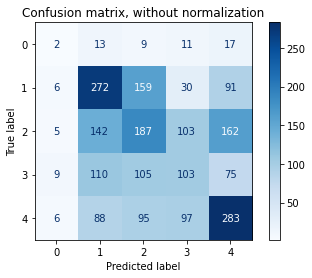

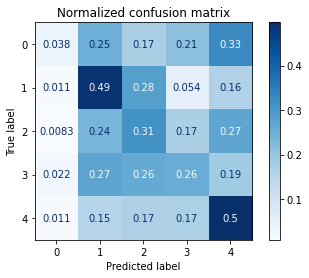

In [190]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = [0, 1, 2, 3, 4]
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        kdtree,
        x_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)